### **PROJECT TOPIC :** Predictive analysis for Knowledge retention
#### **Group Members :**
#####  

*   Siddharth Kanikdale - 110
*   Shweta Kumar - 101
*   Madhu Singh - 093
*   Shwetali Desai - 011

#### **Project Guide :**
#####  Prof. S. M. Bhagat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#### **About the dataset :**
#### The dataset is generated from moodle course which provides us the scores of the assessments conducted by the faculty. The data contains 13 columns.
*   First Name - The first name provided by the students in the course.
*   Surname - The last name provided by the students in the course.
*   ID number - The unique ID that is stored by the students(in our case it is NaN) because no ID is provided by the students.
*   Institution - The name of the institution the student is currently studying in.
*   Department - The department of the student(in our case all the students are from Computer science background).
*   Email Address - The email address of the student.
*   PRN - The permanenet roll number of the student provided by the college.
*   Roll No - The roll number givent o the student.
*   Assignment(100) - The marks of the student in assignment conducted by faculty out of 100.
*   Forum(5) - The marks of the student in forum conducted by faculty out of 5.
*   Quiz Unit 1(20) - The marks of the student in quiz conducted by faculty out of 20.
*   Course total(125) - The total marks obtained by the student in all the assessments.
*   Last downloaded from the course - This is a field provided by moodle which is the time stamp of the downloaded data(i.e When the data is downloaded).

####**Note :** 
####In the dataset some data is collected from the students and some data is dummy data used for the training of the algorithm.
####The First name and Roll number column have same data as the students have entered roll number as their first name in Moodle.  


In [ ]:
result_all_grade = pd.read_csv('Result_Data_Moodle - All grades.csv')
result_all_grade.head()

,First name,Surname,ID number,Institution,Department,Email address,PRN,Roll No,Assignment(100),Forum(5),Quiz Unit 1(20),In Class Assignment(50),Course total (125),Last downloaded from this course,Outcome
0,101,Anurag Taparia,NaN,MIT Academy of Engineering,Computer Science,ajtaparia@mitaoe.ac.in,120190001,101,79,3,14,43,96,1644518255,Average
1,102,Madhu Singh,NaN,MIT Academy of Engineering,Computer Science,masingh@mitaoe.ac.in,120190002,102,84,4,16,47,104,1644518255,Average
2,103,Shweta Kumar,NaN,MIT Academy of Engineering,Computer Science,srkumar@mitaoe.ac.in,120190003,103,67,2,10,32,79,1644518255,Poor
3,104,Shwetali Desai,NaN,MIT Academy of Engineering,Computer Science,shwetalidesai@mitaoe.ac.in,120190004,104,57,1,6,20,64,1644518255,Poor
4,105,Siddharth Kanikdale,NaN,MIT Academy of Engineering,Computer Science,spkanikdale@mitaoe.ac.in,120190005,105,69,2,7,26,78,1644518255,Poor


In [ ]:
result_quiz_ind = pd.read_csv('Quiz_Individual.csv')
result_quiz_ind.head()

,Surname,First name,State,Started on,Completed,Time taken,Grade/20.00
0,Anurag Taparia,101,Finished,10-02-22 23:49,10-02-22 23:50,14 mins 50 sec,14
1,Madhu Singh,102,Finished,10-02-22 23:51,10-02-22 23:51,16 mins 30 sec,16
2,Shweta Kumar,103,Finished,11-02-22 23:51,11-02-22 23:51,10 mins 50 sec,10
3,Shwetali Desai,104,Finished,12-02-22 23:51,12-02-22 23:51,6 mins 50 sec,6
4,Siddharth Kanikdale,105,Finished,13-02-22 23:51,13-02-22 23:51,7 mins 50 sec,7


In [ ]:
from pandas.core.frame import DataFrame
df_allG = DataFrame(result_all_grade)
df_quiz = DataFrame(result_quiz_ind)

In [ ]:
df_quiz['Time taken'] = df_quiz['Time taken'].str.replace('mins....sec', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
convert_type = {'Time taken' :int}
df_quiz = df_quiz.astype(convert_type)
df_quiz.head()

,Surname,First name,State,Started on,Completed,Time taken,Grade/20.00
0,Anurag Taparia,101,Finished,10-02-22 23:49,10-02-22 23:50,14,14
1,Madhu Singh,102,Finished,10-02-22 23:51,10-02-22 23:51,16,16
2,Shweta Kumar,103,Finished,11-02-22 23:51,11-02-22 23:51,10,10
3,Shwetali Desai,104,Finished,12-02-22 23:51,12-02-22 23:51,6,6
4,Siddharth Kanikdale,105,Finished,13-02-22 23:51,13-02-22 23:51,7,7


In [ ]:
df_quiz.dtypes

Surname        object
First name      int64
State          object
Started on     object
Completed      object
Time taken      int64
Grade/20.00     int64
dtype: object

In [ ]:
df_allG['Quiz Time'] = df_quiz['Time taken']
result = df_allG

In [ ]:
result.head()

,First name,Surname,ID number,Institution,Department,Email address,PRN,Roll No,Assignment(100),Forum(5),Quiz Unit 1(20),In Class Assignment(50),Course total (125),Last downloaded from this course,Outcome,Quiz Time
0,101,Anurag Taparia,NaN,MIT Academy of Engineering,Computer Science,ajtaparia@mitaoe.ac.in,120190001,101,79,3,14,43,96,1644518255,Average,14
1,102,Madhu Singh,NaN,MIT Academy of Engineering,Computer Science,masingh@mitaoe.ac.in,120190002,102,84,4,16,47,104,1644518255,Average,16
2,103,Shweta Kumar,NaN,MIT Academy of Engineering,Computer Science,srkumar@mitaoe.ac.in,120190003,103,67,2,10,32,79,1644518255,Poor,10
3,104,Shwetali Desai,NaN,MIT Academy of Engineering,Computer Science,shwetalidesai@mitaoe.ac.in,120190004,104,57,1,6,20,64,1644518255,Poor,6
4,105,Siddharth Kanikdale,NaN,MIT Academy of Engineering,Computer Science,spkanikdale@mitaoe.ac.in,120190005,105,69,2,7,26,78,1644518255,Poor,7


In [ ]:
print('The shape of the data is ', result.shape)

print('Here is the discription of data : ')
result.describe()

The shape of the data is  (299, 16)
Here is the discription of data : 


,First name,ID number,PRN,Roll No,Assignment(100),Forum(5),Quiz Unit 1(20),In Class Assignment(50),Course total (125),Last downloaded from this course,Quiz Time
count,299.000000,0.0,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,299.000000
mean,250.000000,NaN,1.201902e+08,250.000000,74.117057,3.026756,11.963211,30.725753,89.107023,1.644518e+09,10.719064
std,86.458082,NaN,8.645808e+01,86.458082,15.400351,1.363210,5.139855,11.721247,21.056537,0.000000e+00,5.674150
min,101.000000,NaN,1.201900e+08,101.000000,12.000000,0.000000,0.000000,5.000000,17.000000,1.644518e+09,0.000000
25%,175.500000,NaN,1.201901e+08,175.500000,61.000000,2.000000,7.000000,20.000000,71.500000,1.644518e+09,6.000000
50%,250.000000,NaN,1.201902e+08,250.000000,75.000000,3.000000,13.000000,32.000000,90.000000,1.644518e+09,11.000000
75%,324.500000,NaN,1.201902e+08,324.500000,86.500000,4.000000,16.000000,41.000000,105.500000,1.644518e+09,15.000000
max,399.000000,NaN,1.201903e+08,399.000000,100.000000,5.000000,20.000000,49.000000,125.000000,1.644518e+09,20.000000


In [ ]:
print('Columns : ')
print(result.columns)

Columns : 
Index(['First name', 'Surname', 'ID number', 'Institution', 'Department',
       'Email address', 'PRN', 'Roll No', 'Assignment(100)', 'Forum(5)',
       'Quiz Unit 1(20)', 'In Class Assignment(50)', 'Course total (125)',
       'Last downloaded from this course', 'Outcome', 'Quiz Time'],
      dtype='object')


In [ ]:
result = result.drop(["First name", "ID number", "Institution", "Email address", "Last downloaded from this course"], axis=1)

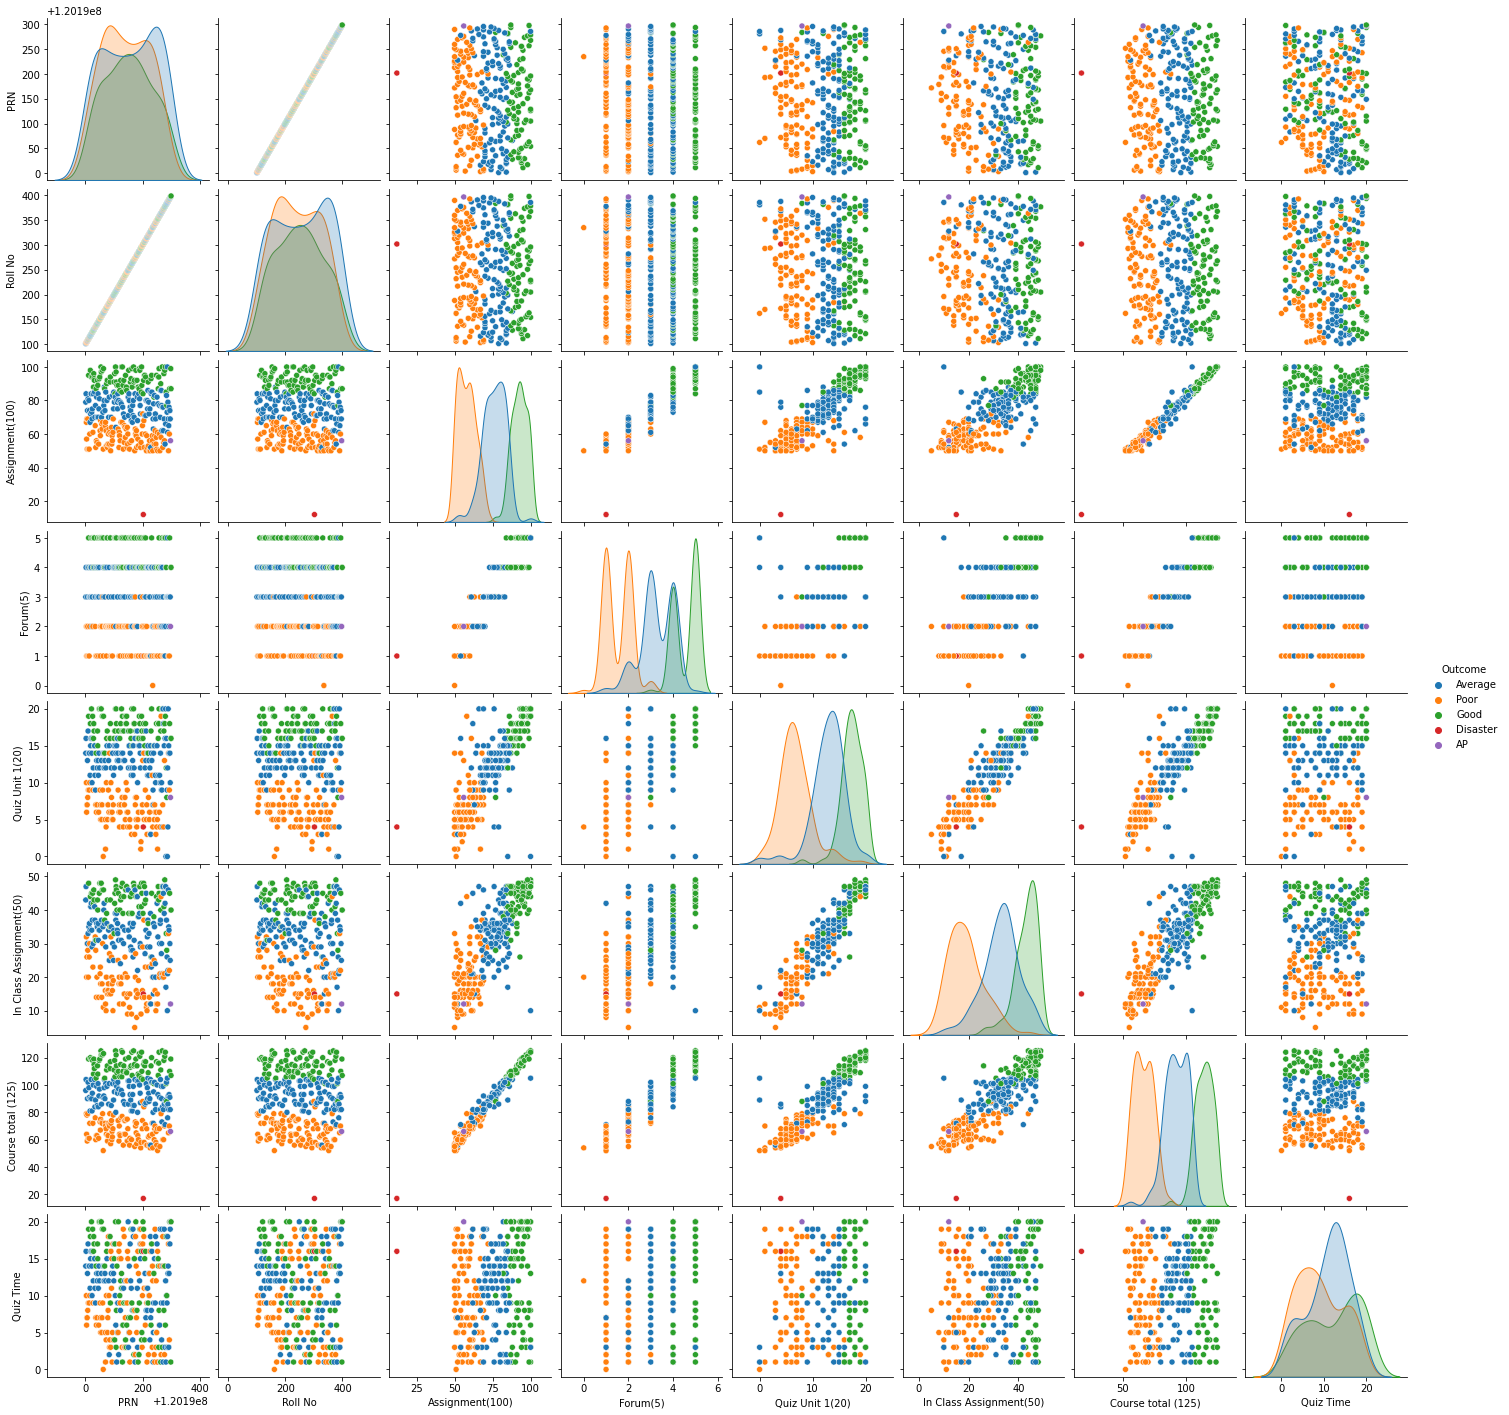

In [ ]:
import seaborn as sns
sns.pairplot(result, hue='Outcome')

In [ ]:
index = result.columns.get_loc('Assignment(100)')
print(index)

index = result.columns.get_loc('Course total (125)')
index

4


8

In [ ]:
X = result.iloc[:, 4:9]
X['Quiz Time'] = result['Quiz Time'] 
y = result['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('The training size : ', X_train.shape)
print('The testing size : ', X_test.shape)

The training size :  (200, 6)
The testing size :  (99, 6)


##**K-Nearest Neighbor implementation**

###K - Nearest Neighbor is one of the fundamental algorithms in machine learning. Machine learning models use a set of input values to predict output values. K in KNN represents the number of neighbors used to classify the nearest dataset.

* Choosing the right value of K is called parameter tuning and it’s necessary for better results.
* a. K = sqrt (total number of data points).
* b. The odd value of K is always selected to avoid confusion between 2 classes.

####Here we are comparing all the values of 'K' from 1 to 15 using the test scores obtained using differemt 'k' values and selecting the appropriate value.

<center>
<img src='https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png'/>
</center>

In [ ]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


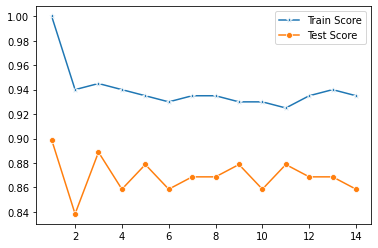

In [ ]:
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

#### **We can see that value of'K' can be 3 and 5 from the plot above, sowe now compare both value 3 and 5 and calculate the accuracy for the model with out test dataset.**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3, weights="uniform", metric="minkowski")
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = KNN.predict(X_test)

print('The confusion matrix : ')
print(confusion_matrix(y_test, y_pred))
print()
print('The accuracy of KNN : ')
accuracy_score(y_test, y_pred)*100

The confusion matrix : 
[[ 0  0  0  1]
 [ 0 28  0  3]
 [ 0  6 21  0]
 [ 0  1  0 39]]

The accuracy of KNN : 


88.88888888888889

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski")
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNN.predict(X_test)

print('The confusion matrix : ')
print(confusion_matrix(y_test, y_pred))
print()
print('The accuracy of KNN : ')
accuracy_score(y_test, y_pred)*100

The confusion matrix : 
[[ 0  0  0  1]
 [ 0 28  0  3]
 [ 0  5 22  0]
 [ 0  3  0 37]]

The accuracy of KNN : 


87.87878787878788

####**Here, we see that the accuracy of KNN using 'K' value 3 is more than that of by using value 5**



####**Now, let use compare another algorithm so that we choose a proper algorithm with high accuracy**

##**Naive Bayes** 
* Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. 
* It is mainly used in classification that includes a high-dimensional training dataset. 
* Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
* It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.

<center>
<img  src='https://static.javatpoint.com/tutorial/machine-learning/images/naive-bayes-classifier-algorithm.png'/> 
</center>

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = NB.predict(X_test)

print('The confusion matrix for Naive Bayes : ')
print(confusion_matrix(y_test, y_pred_NB))
print()
print('The accuracy score for Naive Bayes : ')
accuracy_score(y_test, y_pred_NB)*100

The confusion matrix for Naive Bayes : 
[[ 0  0  0  1]
 [ 0 28  0  3]
 [ 0  4 23  0]
 [ 0  2  0 38]]

The accuracy score for Naive Bayes : 


89.8989898989899

####**Conclusions :**
1. We get the accuracy of K-Nearest Neighbors with K-value 3 as 88.89
  and K-value 5 as 87.87 
2. We get the accuracy of Naive Bayes algorithm as 89.89


Both the algorithms have approximately same accuracy beacause the dataset that we have used has only 300 entries.

